In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bestsellers_amazon_com_1k_sample.csv to bestsellers_amazon_com_1k_sample.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('bestsellers_amazon_com_1k_sample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1000 non-null   object 
 1   name          1000 non-null   object 
 2   review_avg    884 non-null    float64
 3   review_count  884 non-null    float64
 4   ranks         1000 non-null   object 
 5   min_rank      1000 non-null   int64  
 6   max_rank      1000 non-null   int64  
 7   ranks_count   1000 non-null   int64  
 8   offer         915 non-null    float64
 9   offers        915 non-null    float64
 10  tag1          323 non-null    object 
 11  tag2          293 non-null    object 
 12  request_date  1000 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 101.7+ KB


In [ ]:
df.head()

,sku,name,review_avg,review_count,ranks,min_rank,max_rank,ranks_count,offer,offers,tag1,tag2,request_date
0,B09TT6BVDS,BARNESMITH Spirit Logo Adult Unisex Short-Slee...,4.7,73.0,"{/sporting-goods/374742011/=77, /sporting-good...",31,77,2,15.36,148.0,NaN,NaN,2022-05-08
1,B07XYMX8NJ,WADEO Low Pressure LPG Propane Gas Fireplace F...,4.4,554.0,{/lawn-garden/10253330011/=4},4,4,1,19.99,1.0,NaN,NaN,2022-05-08
2,B09MCZGVQJ,SunnyPoint 3-Tier Delicate Compact Rolling Met...,4.5,271.0,"{/office-products/490895011/=17, /office-produ...",17,48,2,40.47,3.0,NaN,NaN,2022-05-08
3,B003TQ8EUK,Longacre Mini XLT ROLL BAR Padding-B,3.7,8.0,{/automotive/3147711011/=77},77,77,1,29.99,2.0,NaN,NaN,2022-05-08
4,B000H25VBE,"La Preferida Spanish Rice in a Box, 5.25 oz, (...",4.8,161.0,{/grocery/6464133011/=82},82,82,1,28.18,11.0,NaN,NaN,2022-05-08


Data Preprocessing

In [ ]:
data = df.copy()

data.drop(data.columns[-2:-4:-1],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1000 non-null   object 
 1   name          1000 non-null   object 
 2   review_avg    884 non-null    float64
 3   review_count  884 non-null    float64
 4   ranks         1000 non-null   object 
 5   min_rank      1000 non-null   int64  
 6   max_rank      1000 non-null   int64  
 7   ranks_count   1000 non-null   int64  
 8   offer         915 non-null    float64
 9   offers        915 non-null    float64
 10  request_date  1000 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 86.1+ KB


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming 'data' is your DataFrame

# Define the columns with missing values
columns_with_missing = [2, 3, 8, 9]

for col in columns_with_missing:
    # Split the data into two parts: one with missing values and one without
    missing_data = data[data.iloc[:, col].isnull()]
    complete_data = data.dropna(subset=[data.columns[col]])

    # Separate the features and target variable
    numeric_columns = [col for col in complete_data.columns if pd.api.types.is_numeric_dtype(complete_data[col])]
    non_numeric_columns = [col for col in complete_data.columns if col not in numeric_columns]

    X_complete = complete_data[numeric_columns].drop(columns=[data.columns[col], data.columns[5]])
    y_complete = complete_data.iloc[:, 5]  # Assuming column 6 is the target variable

    X_missing = missing_data[numeric_columns].drop(columns=[data.columns[col], data.columns[5]])

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    X_complete_imputed = imputer.fit_transform(X_complete)
    X_missing_imputed = imputer.transform(X_missing)

    # Perform linear regression
    model = LinearRegression()
    model.fit(X_complete_imputed, y_complete)

    # Predict missing values
    missing_values_predicted = model.predict(X_missing_imputed)

    # Fill missing values in the original dataframe
    data.loc[data.iloc[:, col].isnull(), data.columns[col]] = missing_values_predicted


In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1000 non-null   object 
 1   name          1000 non-null   object 
 2   review_avg    1000 non-null   float64
 3   review_count  1000 non-null   float64
 4   ranks         1000 non-null   object 
 5   min_rank      1000 non-null   int64  
 6   max_rank      1000 non-null   int64  
 7   ranks_count   1000 non-null   int64  
 8   offer         1000 non-null   float64
 9   offers        1000 non-null   float64
 10  request_date  1000 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 86.1+ KB


,sku,name,review_avg,review_count,ranks,min_rank,max_rank,ranks_count,offer,offers,request_date
0,B09TT6BVDS,BARNESMITH Spirit Logo Adult Unisex Short-Slee...,4.7,73.0,"{/sporting-goods/374742011/=77, /sporting-good...",31,77,2,15.36,148.0,2022-05-08
1,B07XYMX8NJ,WADEO Low Pressure LPG Propane Gas Fireplace F...,4.4,554.0,{/lawn-garden/10253330011/=4},4,4,1,19.99,1.0,2022-05-08
2,B09MCZGVQJ,SunnyPoint 3-Tier Delicate Compact Rolling Met...,4.5,271.0,"{/office-products/490895011/=17, /office-produ...",17,48,2,40.47,3.0,2022-05-08
3,B003TQ8EUK,Longacre Mini XLT ROLL BAR Padding-B,3.7,8.0,{/automotive/3147711011/=77},77,77,1,29.99,2.0,2022-05-08
4,B000H25VBE,"La Preferida Spanish Rice in a Box, 5.25 oz, (...",4.8,161.0,{/grocery/6464133011/=82},82,82,1,28.18,11.0,2022-05-08


In [ ]:
#Dropping object columns
data.drop(columns=data.columns[[0,1,4,10]],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_avg    1000 non-null   float64
 1   review_count  1000 non-null   float64
 2   min_rank      1000 non-null   int64  
 3   max_rank      1000 non-null   int64  
 4   ranks_count   1000 non-null   int64  
 5   offer         1000 non-null   float64
 6   offers        1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


In [ ]:
#Separating target variable min_rank from the features
# Define the column index of the target variable
target_column_index = 2  # Adjust this according to your specific dataframe

# Separate the features (independent variables) and target variable
X = data.drop(columns=[data.columns[target_column_index]])
y = data.iloc[:, target_column_index]

# Now, X contains all the independent variables, and y contains the target variable
print(X,y)

     review_avg  review_count  max_rank  ranks_count  offer  offers
0       4.70000     73.000000        77            2  15.36   148.0
1       4.40000    554.000000         4            1  19.99     1.0
2       4.50000    271.000000        48            2  40.47     3.0
3       3.70000      8.000000        77            1  29.99     2.0
4       4.80000    161.000000        82            1  28.18    11.0
..          ...           ...       ...          ...    ...     ...
995    33.21044     -8.012861        35            1  12.99    27.0
996     4.70000     11.000000        65            1   9.60    17.0
997     4.60000     19.000000        85            1   8.99     1.0
998     4.50000    191.000000        57            1  16.45     2.0
999     4.70000    970.000000        44            1  12.99     1.0

[1000 rows x 6 columns] 0      31
1       4
2      17
3      77
4      82
       ..
995    35
996    65
997    85
998    57
999    44
Name: min_rank, Length: 1000, dtype: int64


In [ ]:
#Normalizing x
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now, X_scaled_df contains the z-score normalized values of all columns in X


Simple KNN Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Instantiate KNN Regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 141.9866


In [ ]:
from sklearn.metrics import r2_score

# Predict on the training data
y_train_pred = knn.predict(X_train)

# Calculate R^2 score for training data
r2_train = r2_score(y_train, y_train_pred)
print("Training R^2 score:", r2_train)

# Predict on the test data
y_test_pred = knn.predict(X_test)

# Calculate R^2 score for testing data
r2_test = r2_score(y_test, y_test_pred)
print("Testing R^2 score:", r2_test)


Training R^2 score: 0.8906169071433356
Testing R^2 score: 0.8329999633329754


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load your data and select features
X = data[['review_avg', 'review_count', 'max_rank', 'ranks_count', 'offer', 'offers']]
y = data['min_rank']  # Assuming 'min_rank' is the target variable to predict

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN regressor
knn_reg = KNeighborsRegressor()

# Define hyperparameters to tune
param_grid = {'n_neighbors': range(1, 21)}  # Tune the number of neighbors from 1 to 20

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best MSE on Cross-Validation:", -grid_search.best_score_)
print("MSE on Test Set:", mse)


Best Parameters: {'n_neighbors': 8}
Best MSE on Cross-Validation: 459.44892578125
MSE on Test Set: 394.02046875


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your data into a pandas DataFrame
#data = pd.read_csv('your_data.csv')

data.info()

# Separate features (X) and target variable (y)
X = data[['review_avg', 'review_count', 'max_rank', 'ranks_count', 'offer', 'offers']]
y = data['min_rank']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(max_leaf_nodes=100)
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree Regression
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)
dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)

print('Decision Tree Regression:')
print('Train MSE:', dt_train_mse)
print('Test MSE:', dt_test_mse)
print('Train R^2:', dt_train_r2)
print('Test R^2:', dt_test_r2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_avg    1000 non-null   float64
 1   review_count  1000 non-null   float64
 2   min_rank      1000 non-null   int64  
 3   max_rank      1000 non-null   int64  
 4   ranks_count   1000 non-null   int64  
 5   offer         1000 non-null   float64
 6   offers        1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB
Decision Tree Regression:
Train MSE: 4.842671833118649
Test MSE: 137.42332031380795
Train R^2: 0.9943159545926104
Test R^2: 0.8383671449889625


In [ ]:
#Neural Network
# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', 'mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate the model
evaluation_metrics = model.evaluate(X_train, y_train, verbose=0)
nn_train_mse = evaluation_metrics[0]
nn_train_mae = evaluation_metrics[1]

evaluation_metrics = model.evaluate(X_test, y_test, verbose=0)
nn_test_mse = evaluation_metrics[0]
nn_test_mae = evaluation_metrics[1]

print('\nNeural Network:')
print('Train MSE:', nn_train_mse)
print('Test MSE:', nn_test_mse)
print('Train MAE:', nn_train_mae)
print('Test MAE:', nn_test_mae)



Neural Network:
Train MSE: 156.9357452392578
Test MSE: 205.49781799316406
Train MAE: 156.9357452392578
Test MAE: 205.49781799316406


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# Define a function to create the neural network model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(6,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a KerasRegressor
model = create_model()

# Define the parameter grid
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [16, 32, 64]
}

# Create a mean squared error scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scorer, verbose=2)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and mean cross-validated score
print("Best Parameters:", grid_result.best_params_)
print("Best MSE on Cross-Validation:", -grid_result.best_score_)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
mse = best_model.evaluate(X_test, y_test)
print("MSE on Test Set:", mse)


TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x78474d42e710>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Separate features (X)
X = data[['review_avg', 'review_count', 'max_rank', 'ranks_count', 'offer', 'offers']]

# Perform KNN clustering to get nearest neighbors
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Construct the distance matrix for KMeans clustering
knn_distances = distances[:, 1:]

# Calculate the silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(knn_distances)
    silhouette_score_ = silhouette_score(knn_distances, cluster_labels, metric='euclidean')
    silhouette_scores.append(silhouette_score_)
    print(f"For n_clusters={n_clusters}, the silhouette score is: {silhouette_score_:.3f}")

# Find the optimal number of clusters based on the highest silhouette score
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nThe optimal number of clusters is: {optimal_n_clusters}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is: 0.997
For n_clusters=3, the silhouette score is: 0.995
For n_clusters=4, the silhouette score is: 0.983


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is: 0.980
For n_clusters=6, the silhouette score is: 0.967
For n_clusters=7, the silhouette score is: 0.967


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is: 0.899
For n_clusters=9, the silhouette score is: 0.900
For n_clusters=10, the silhouette score is: 0.820

The optimal number of clusters is: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [92.5, 92.5, 122.5, 122.5],
  [53.75, 53.75, 107.5, 107.5],
  [30.0, 30.0, 80.625, 80.625],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [262.5, 262.5, 292.5, 292.5],
  [217.5, 217.5, 277.5, 277.5],
  [161.25, 161.25, 247.5, 247.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [315.0, 315.0, 333.75, 333.75],
  [375.0, 375.0,

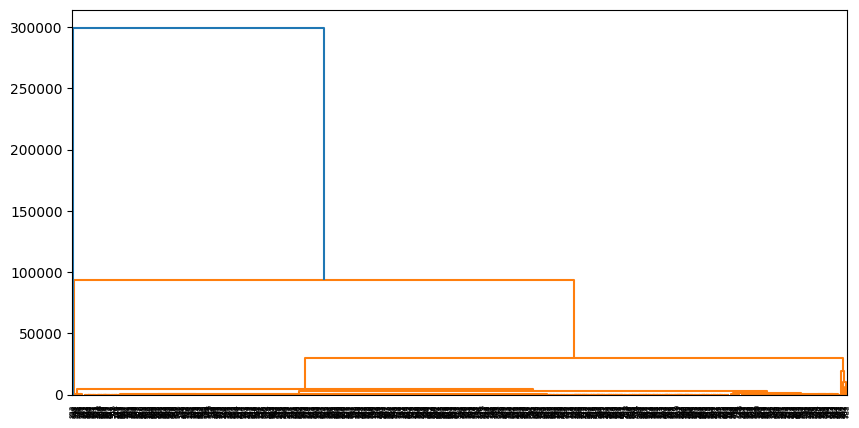

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Separate features (X)
X = data[['review_avg', 'review_count', 'max_rank', 'ranks_count', 'offer', 'offers']]

# Perform KNN clustering to get nearest neighbors
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)
distances, _ = knn.kneighbors(X)

# Construct the distance matrix for hierarchical clustering
knn_distances = distances[:, 1:]

# Perform hierarchical clustering
Z = linkage(knn_distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, p=30, truncate_mode='level', leaf_rotation=90)


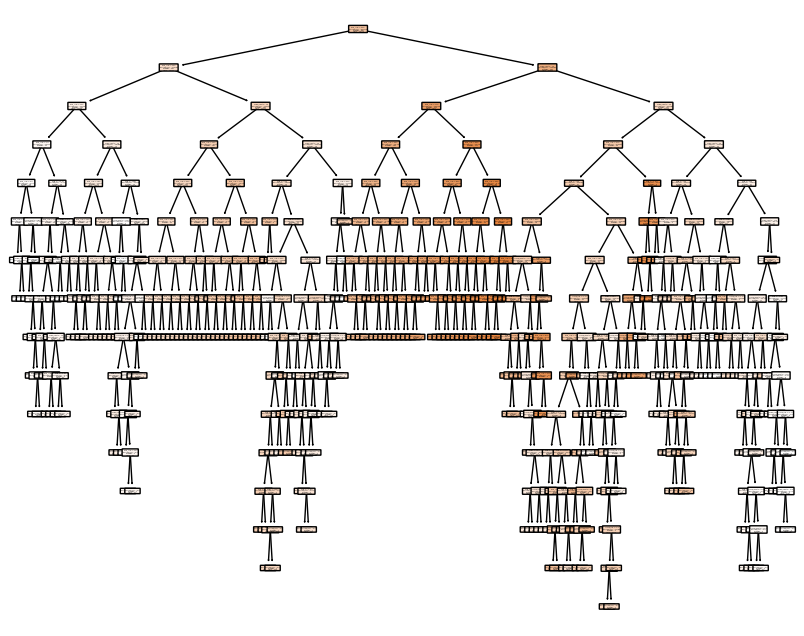

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(10, 8))
tree.plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()

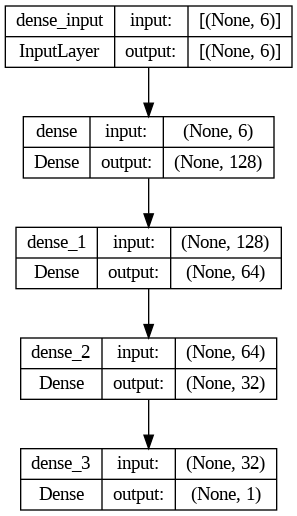

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the Neural Network architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='nn_model.png')

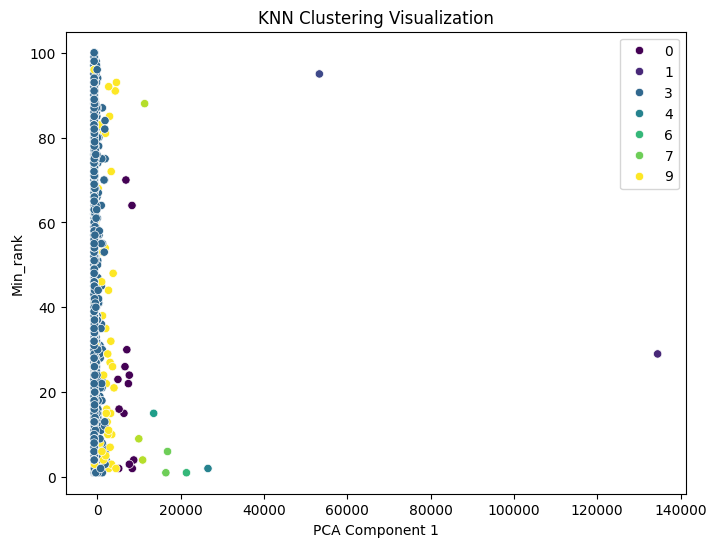

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(y=y, x=X_pca[:, 0], hue=cluster_labels, palette='viridis')
plt.title('KNN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('Min_rank')
plt.show()

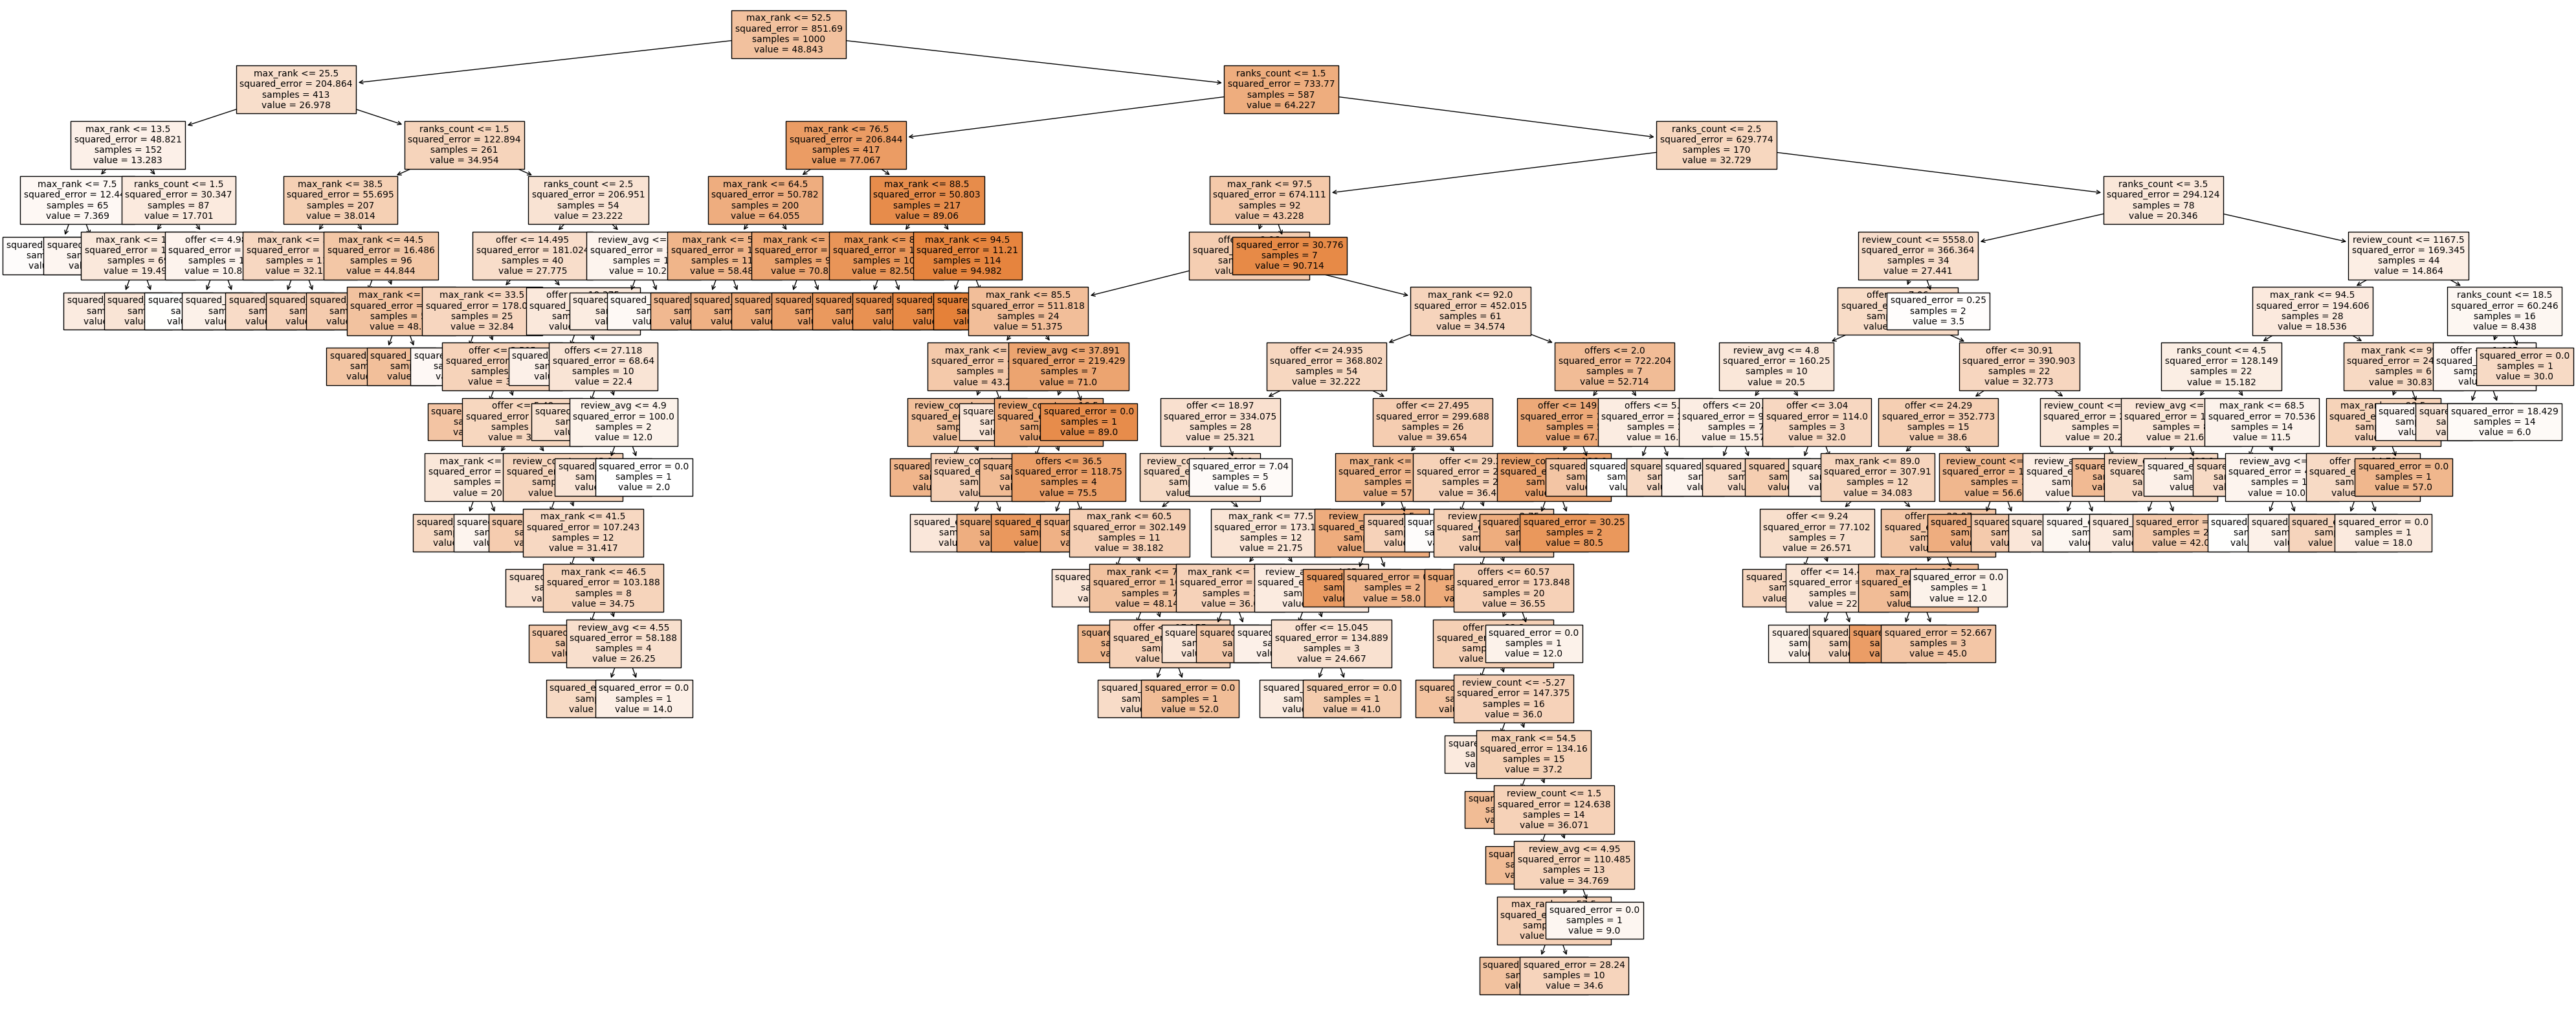

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load your data and select features
X = data[['review_avg', 'review_count', 'max_rank', 'ranks_count', 'offer', 'offers']]
y = data['min_rank']  # Replace 'target_variable' with your actual target variable name

# Create the decision tree regressor with max_leaf_nodes=100
tree_reg = DecisionTreeRegressor(max_leaf_nodes=100)

# Fit the model
tree_reg.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(50,20))
plot_tree(tree_reg, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

# Define a function to create the neural network model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(num_features,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the Keras model as a scikit-learn regressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [16, 32, 64]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and mean cross-validated score
print("Best Parameters:", grid_result.best_params_)
print("Best MSE on Cross-Validation:", -grid_result.best_score_)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
mse = best_model.score(X_test, y_test)
print("MSE on Test Set:", mse)


ModuleNotFoundError: No module named 'keras.wrappers'

In [ ]:
y.mean()

48.843

Mean Squared Error: 180.9852934634177
R^2 Score: 0.7871309641573011


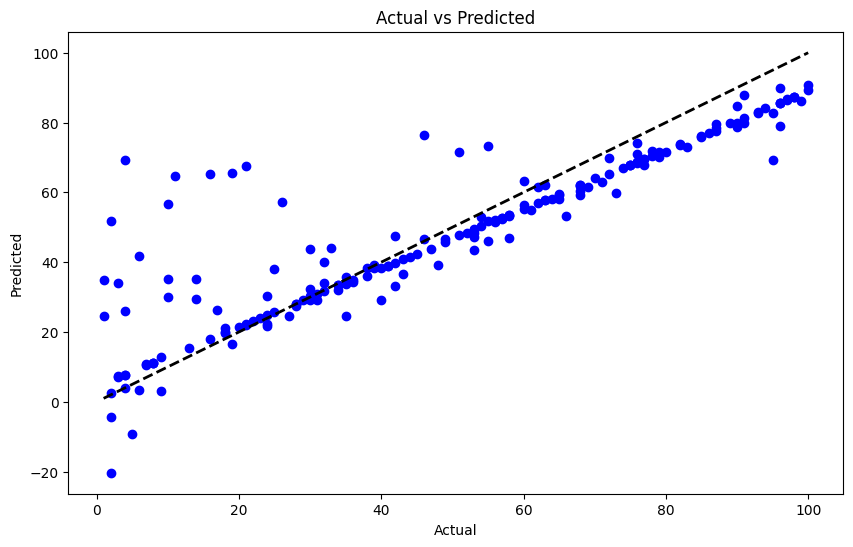

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'dataset.csv' with the actual filename)
#data = pd.read_csv('dataset.csv')

# Selecting the features (X) and target variable (y)
X = data[['review_avg', 'review_count', 'max_rank', 'ranks_count', 'offer', 'offers']]
y = data['min_rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


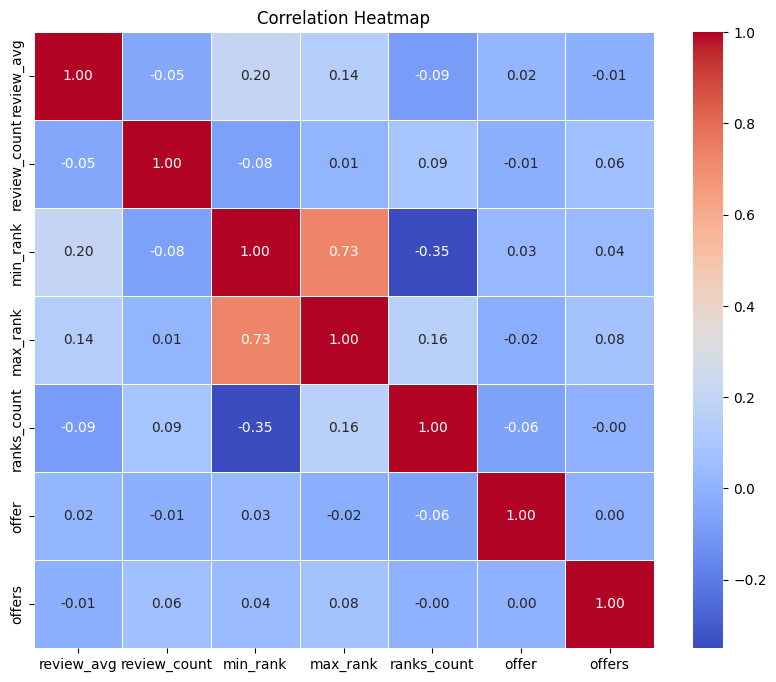

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'dataset.csv' with the actual filename)
#data = pd.read_csv('dataset.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
